
### Convolutional Neural Networks for Image Classification

In [163]:
import pandas as pd
import numpy as np

In [164]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

##  Visualizing the Image Data

In [165]:
import matplotlib.pyplot as plt
%matplotlib inline

In [166]:
x_train.shape

(60000, 28, 28)

In [167]:
single_image = x_train[0]

In [168]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [169]:
single_image.shape

(28, 28)

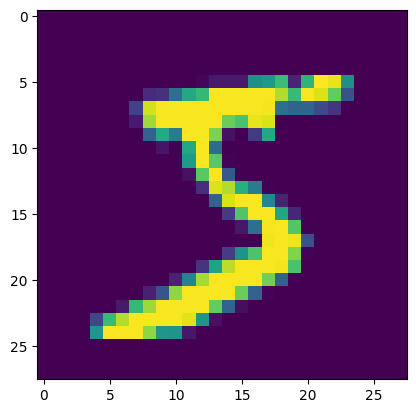

In [170]:
plt.imshow(single_image)
plt.show()

### PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

#### Labels

In [171]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [172]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [173]:
from tensorflow.keras.utils import to_categorical

In [174]:
y_train.shape

(60000,)

In [175]:
y_example = to_categorical(y_train)

In [176]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [177]:
y_example.shape

(60000, 10)

In [178]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [179]:
y_cat_test = to_categorical(y_test,10)

In [180]:
y_cat_train = to_categorical(y_train,10)

### Processing X Data

We should normalize the X data

In [181]:
single_image.max()

np.uint8(255)

In [182]:
single_image.min()

np.uint8(0)

In [183]:
x_train = x_train/255
x_test = x_test/255

In [184]:
scaled_single = x_train[0]

In [185]:
scaled_single.max()

np.float64(1.0)

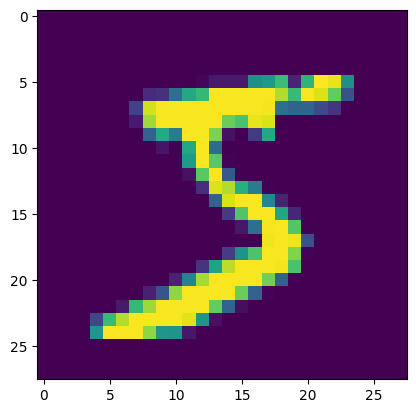

In [186]:
plt.imshow(scaled_single)

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 


In [187]:
x_train.shape

(60000, 28, 28)

In [188]:
x_test.shape

(10000, 28, 28)

Reshape to include channel dimension (in this case, 1 channel)

In [189]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [190]:
x_train.shape

(60000, 28, 28, 1)

In [191]:
x_test = x_test.reshape(10000,28,28,1)

In [192]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

In [193]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [194]:
model = Sequential()

# convolutional layer
model.add(Conv2D(filters=16, kernel_size=(4, 4), input_shape=(28, 28, 1), activation="relu"))

# pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))

# flatten layer
model.add(Flatten())

# dense layer
model.add(Dense(128, activation="relu"))

# output layer
model.add(Dense(10, activation="softmax"))

# compilamos
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [195]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 25, 25, 16)     │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 296,602 (1.13 MB)

 Trainable params: 296,602 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

In [196]:
from tensorflow.keras.callbacks import EarlyStopping

In [197]:
early_stop = EarlyStopping(monitor="val_loss", patience=2)

## Train the Model

In [198]:
model.fit(x_train, y_cat_train, epochs=100, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9052 - loss: 0.3135 - val_accuracy: 0.9794 - val_loss: 0.0603
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9825 - loss: 0.0564 - val_accuracy: 0.9856 - val_loss: 0.0459
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9900 - loss: 0.0346 - val_accuracy: 0.9855 - val_loss: 0.0442
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9918 - loss: 0.0265 - val_accuracy: 0.9857 - val_loss: 0.0466
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9943 - loss: 0.0200 - val_accuracy: 0.9859 - val_loss: 0.0470


## Evaluate the Model

In [199]:
losses = pd.DataFrame(model.history.history)
losses.head()

,accuracy,loss,val_accuracy,val_loss
0,0.952833,0.158794,0.9794,0.060278
1,0.983233,0.053485,0.9856,0.045941
2,0.989217,0.036598,0.9855,0.044165
3,0.991733,0.027775,0.9857,0.046646
4,0.993650,0.021186,0.9859,0.046976


<Axes: >

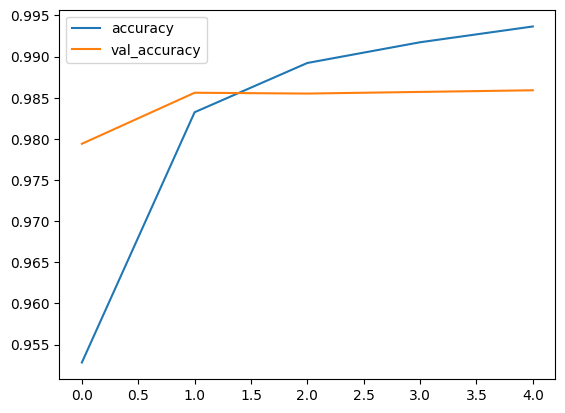

In [200]:
losses[["accuracy", "val_accuracy"]].plot()

<Axes: >

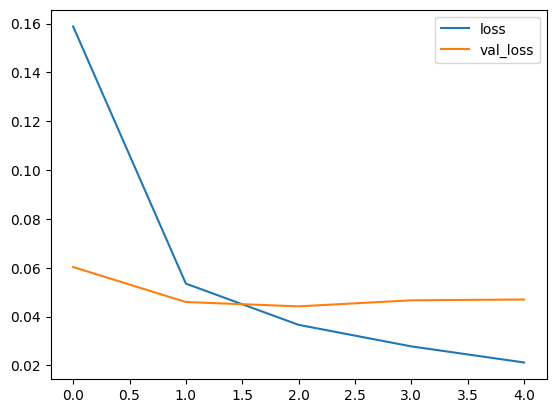

In [201]:
losses[["loss", "val_loss"]].plot()

In [202]:
from sklearn.metrics import confusion_matrix

In [205]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step


array([7, 2, 1, ..., 4, 5, 6])

In [206]:
import seaborn as sns

<Axes: >

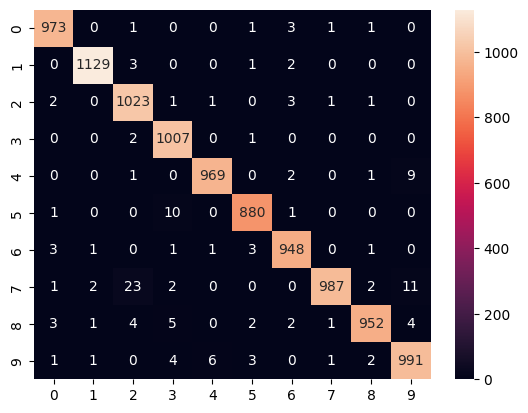

In [207]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d")

#### Save your model

In [208]:
model.save("digits.keras")

#### Load your model

In [ ]:
#NN = model.load("digits.keras")
#NN.predict(new_image)

# Predicting a given image